# 6.4: Supervised Machine Learning: Regression

## 1 Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating a Path
path = r'C:\Users\ivand\Desktop\6.1 - CitiBike Project Folder'

In [4]:
# Importing Data
df_bikes = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'CitiBike_Cleaned.csv'))

In [5]:
# Checking the data set
df_bikes.head(10)

,Unnamed: 0,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown
5,5,Fri,2013-09-27 22:01:01,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female
6,6,Sun,2013-09-29 13:13:06,W 4 St & 7 Ave S,40.734011,-74.002939,2013-09-29 13:23:45,E 6 St & Avenue B,40.724537,-73.981854,639,Subscriber,1994,Male
7,7,Sat,2013-09-21 10:48:14,Bank St & Hudson St,40.736529,-74.006180,2013-09-21 10:52:37,W 16 St & The High Line,40.743349,-74.006818,263,Subscriber,1969,Male
8,8,Fri,2013-09-20 12:29:49,W 51 St & 6 Ave,40.760660,-73.980420,2013-09-20 12:40:55,W 59 St & 10 Ave,40.770513,-73.988038,666,Subscriber,1993,Male
9,9,Tue,2013-09-03 16:56:06,W 24 St & 7 Ave,40.744876,-73.995299,2013-09-03 17:05:48,Columbia St & Rivington St,40.717400,-73.980166,582,Subscriber,1983,Male


## 2 Data Cleaning

In [6]:
# Data set
df_bikes

,Unnamed: 0,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49922,49995,Sat,2013-09-21 18:39:20,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1978,Unknown
49923,49996,Sat,2013-09-14 17:32:26,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female
49924,49997,Sat,2013-09-07 18:08:21,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female
49925,49998,Sat,2013-09-07 13:25:35,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1978,Unknown


In [7]:
# Dropping the "Unnamed: 0" colum
df_bikes.drop(columns = {'Unnamed: 0'}, inplace = True)

In [8]:
# Checking data set again
df_bikes

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49922,Sat,2013-09-21 18:39:20,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1978,Unknown
49923,Sat,2013-09-14 17:32:26,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female
49924,Sat,2013-09-07 18:08:21,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female
49925,Sat,2013-09-07 13:25:35,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1978,Unknown


In [9]:
# Renaming Columns
df_bikes.rename(columns = {'trip_duration_in_minutes' : 'trip_duration_in_seconds'}, inplace = True)

In [10]:
# Checking data set again
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown


#### Checking for Missing Values

In [11]:
df_bikes.isnull().sum()

day_of_week                 0
start_of_ride               0
start_station_name          0
start_station_latitude      0
start_station_longitude     0
end_of_ride                 0
end_station_name            0
end_station_latitude        0
end_station_longitude       0
trip_duration_in_seconds    0
subscriber                  0
year_of_birth               0
gender                      0
dtype: int64

- no missing values we found

#### Checking for Duplicates

In [12]:
# Checking Data set shape
df_bikes.shape

(49927, 13)

In [13]:
dups = df_bikes.duplicated()

In [14]:
dups.shape

(49927,)

- no duplicates were found

## Data Wrangling

In [15]:
# Creating a copy of the startime column, as Python sometimes messes up the original column that you are splitting from.
df_bikes['start_of_ride_new'] = df_bikes['start_of_ride']

In [16]:
# Checking the Data Set
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22


In [17]:
# Converting the new column to datetime
df_bikes['start_of_ride_new']=pd.to_datetime(df_bikes['start_of_ride_new'],infer_datetime_format=True)

C:\Users\ivand\AppData\Local\Temp\ipykernel_15708\1089283715.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bikes['start_of_ride_new']=pd.to_datetime(df_bikes['start_of_ride_new'],infer_datetime_format=True)


In [18]:
# Checking the conversion
df_bikes.dtypes

day_of_week                         object
start_of_ride                       object
start_station_name                  object
start_station_latitude             float64
start_station_longitude            float64
end_of_ride                         object
end_station_name                    object
end_station_latitude               float64
end_station_longitude              float64
trip_duration_in_seconds             int64
subscriber                          object
year_of_birth                        int64
gender                              object
start_of_ride_new           datetime64[ns]
dtype: object

In [19]:
# Spliting into time and date columns
df_bikes["Start_Date"] = df_bikes["start_of_ride_new"].dt.date
df_bikes["Start_Time"] = df_bikes["start_of_ride_new"].dt.time

In [20]:
# Checking the new data set
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new,Start_Date,Start_Time
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55,2013-09-09,18:18:55
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53,2013-09-12,18:38:53
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04,2013-09-18,19:44:04
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37,2013-09-28,11:54:37
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22,2013-09-07,18:08:22


#### Rounding up the Hours in "Start_Time" column

In [21]:
df_bikes['Start_Time'] = pd.to_datetime(df_bikes['Start_Time'], format='%H:%M:%S')

In [22]:
def round_up_hour(time):
    if time.minute >= 30:
        time = time + pd.DateOffset(hours=1)
    return time.replace(minute=0, second=0)

In [23]:
df_bikes['Start_Time'] = df_bikes['Start_Time'].apply(round_up_hour)

In [24]:
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new,Start_Date,Start_Time
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55,2013-09-09,1900-01-01 18:00:00
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53,2013-09-12,1900-01-01 19:00:00
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04,2013-09-18,1900-01-01 20:00:00
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37,2013-09-28,1900-01-01 12:00:00
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22,2013-09-07,1900-01-01 18:00:00


#### Changing the Hour timestamp to show only one full number

In [25]:
df_bikes['Start_Time'] = df_bikes['Start_Time'].dt.strftime('%H')

In [26]:
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new,Start_Date,Start_Time
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55,2013-09-09,18
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53,2013-09-12,19
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04,2013-09-18,20
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37,2013-09-28,12
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22,2013-09-07,18


In [27]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49927 entries, 0 to 49926
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   day_of_week               49927 non-null  object        
 1   start_of_ride             49927 non-null  object        
 2   start_station_name        49927 non-null  object        
 3   start_station_latitude    49927 non-null  float64       
 4   start_station_longitude   49927 non-null  float64       
 5   end_of_ride               49927 non-null  object        
 6   end_station_name          49927 non-null  object        
 7   end_station_latitude      49927 non-null  float64       
 8   end_station_longitude     49927 non-null  float64       
 9   trip_duration_in_seconds  49927 non-null  int64         
 10  subscriber                49927 non-null  object        
 11  year_of_birth             49927 non-null  int64         
 12  gender            

In [28]:
# Convert "Start_Time" to int8 for the visualizations
df_bikes['Start_Time'] = df_bikes['Start_Time'].astype('int8')

In [29]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49927 entries, 0 to 49926
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   day_of_week               49927 non-null  object        
 1   start_of_ride             49927 non-null  object        
 2   start_station_name        49927 non-null  object        
 3   start_station_latitude    49927 non-null  float64       
 4   start_station_longitude   49927 non-null  float64       
 5   end_of_ride               49927 non-null  object        
 6   end_station_name          49927 non-null  object        
 7   end_station_latitude      49927 non-null  float64       
 8   end_station_longitude     49927 non-null  float64       
 9   trip_duration_in_seconds  49927 non-null  int64         
 10  subscriber                49927 non-null  object        
 11  year_of_birth             49927 non-null  int64         
 12  gender            

#### Extreme Values Check

C:\Users\ivand\AppData\Local\Temp\ipykernel_15708\662362971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bikes['trip_duration_in_seconds'], bins=25) # Shows extreme values


<Axes: xlabel='trip_duration_in_seconds', ylabel='Density'>

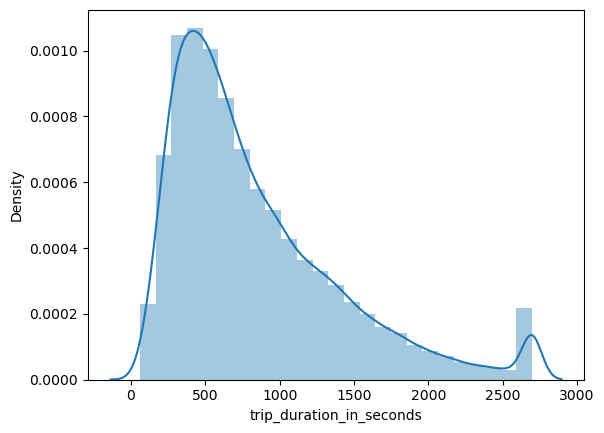

In [30]:
sns.distplot(df_bikes['trip_duration_in_seconds'], bins=25) # Shows extreme values

- Initially we see an outlier (extreme value) around the 2600-2700 (45 minutes) seconds which is interesting and could mean a couple of things
- First - there are many rides of about 45 minutes, because someone is using the bike and the destination is 45 minutes away;
- Second - there are many people that forget to check-out the bike;
- Third - maybe it happens on a specific day, for example if this spike is during the weekend maybe people are using it for a casual ride.
- All of these can be observed in later analysis.
- We will keep this for now.

In [31]:
df_bikes['trip_duration_in_seconds'].describe()

count    49927.000000
mean       838.882088
std        573.731229
min         60.000000
25%        417.000000
50%        672.000000
75%       1112.000000
max       2697.000000
Name: trip_duration_in_seconds, dtype: float64

- we see a ride of 60 seconds, which is 1 minute and it seems as an outlier

In [32]:
# Counting how many times this outlier occurs within our data set
count_60_seconds = (df_bikes['trip_duration_in_seconds'] == 60).sum()

In [33]:
count_60_seconds

9

In [34]:
# Removing the outliers
df_bikes = df_bikes[df_bikes['trip_duration_in_seconds'] != 60]

In [35]:
df_bikes.shape

(49918, 16)

### Hypothesis: The later hour of the day, the longer the trips.

## Data prep for regression analysis

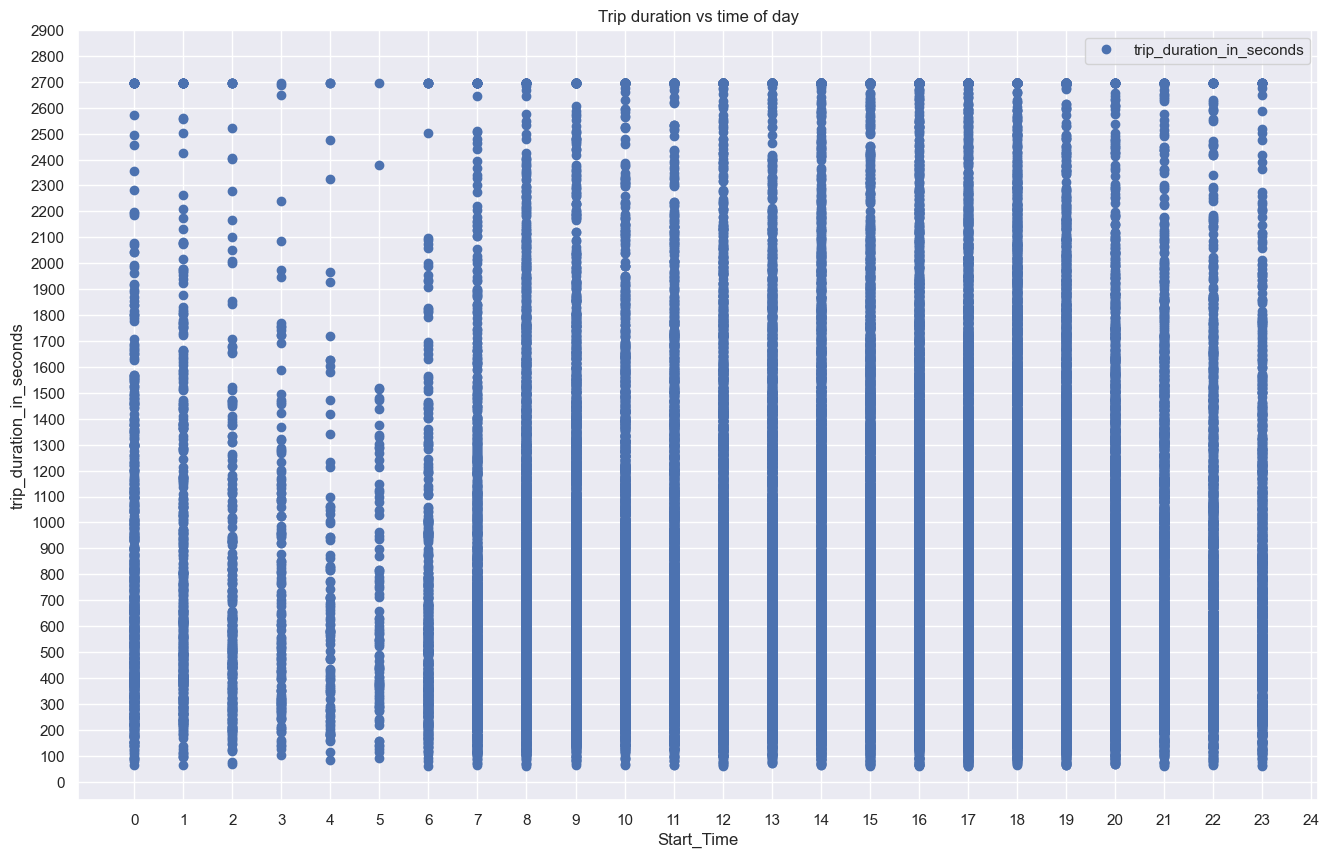

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sns.set(rc={"figure.figsize":(16, 10)})
df_bikes.plot(x = 'Start_Time', y='trip_duration_in_seconds',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip duration vs time of day')  
plt.xlabel('Start_Time')  
plt.ylabel('trip_duration_in_seconds')
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 3000, 100))
plt.show()

In [37]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_bikes['Start_Time'].values.reshape(-1,1)
y = df_bikes['trip_duration_in_seconds'].values.reshape(-1,1)

In [38]:
X

array([[18],
       [19],
       [20],
       ...,
       [18],
       [13],
       [22]], dtype=int8)

In [39]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]], dtype=int64)

In [40]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression Analysis

In [41]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fitted onto the training set.

In [42]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

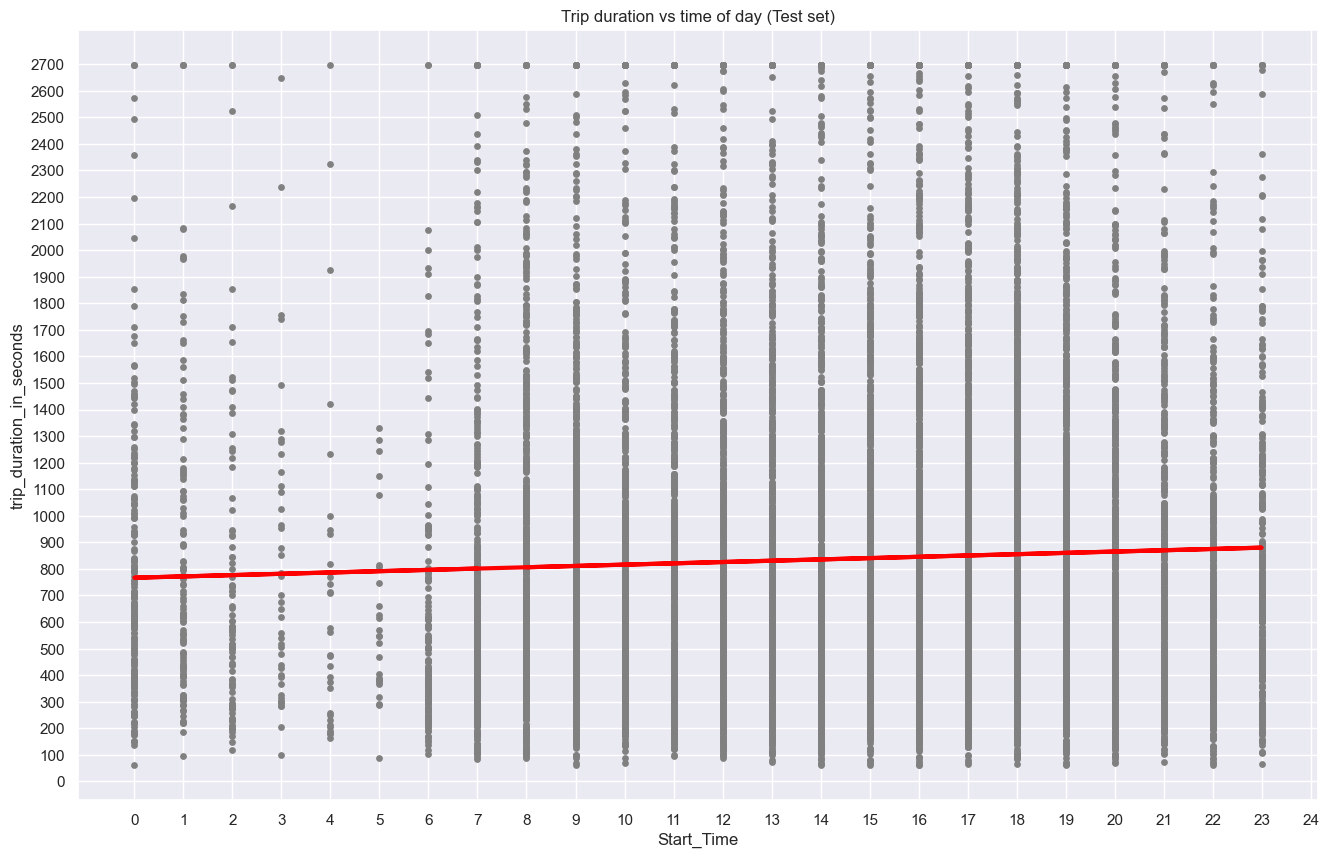

In [44]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip duration vs time of day (Test set)')
plot_test.xlabel('Start_Time')
plot_test.ylabel('trip_duration_in_seconds')
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 2800, 100))
plot_test.show()

- We observe that at first glance there is almost no relationship between the Start_Time and the duration of the trips. It is only slightly indicated that the farther the time goes = the longer the trips. This could be explained by people taking longer to go back from whence they went to. Maybe during the morning they are running late and the trips are slightly shorter.

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.91994124]]
Mean squared error:  332928.9393714533
R2 score:  0.0018911037242796969


- The Slope as positive as it may show, it is still very close to 0, which indicates that the relationship between X and Y would stay fairly the same over time.
- The MSE shows that the data points are extreeemly far from the regression line, which hardens the answer that a regression line will not be useful for this hypothesis.
- The R2 score is very far off from 1, which means we can be 100% sure after all these 3 measurements that this model is NOT fit for a prediction.

In [47]:
y_predicted

array([[806.23636628],
       [840.67595497],
       [845.59589621],
       ...,
       [811.15630752],
       [825.91613124],
       [801.31642504]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,186,806.236366
1,434,840.675955
2,348,845.595896
3,572,870.195602
4,243,835.756014
5,369,875.115544
6,1546,860.355720
7,2534,870.195602
8,289,776.716719
9,415,820.996190


- As we can see all the predictions are way off from the actual data.

#### Generally we can say that Linear Regression prediction modelling will not work for this hypothesis. And while it can slightly prove our hypothesis, it is definitely not the model for being certain about the output. For this hypothesis, another model must be used.

# Exporting the newly cleaned data set

In [49]:
df_bikes.to_csv(os.path.join(path, '02 Data','Prepared Data', 'CitiBikes_New.csv'))